<a href="https://colab.research.google.com/github/UditaAgrawal30/NBA-Playoffs-Prediction/blob/main/NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving NBA_train.csv to NBA_train.csv


In [ ]:
nba_train=pd.read_csv("NBA_train.csv")

In [ ]:
nba_train.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


In [ ]:
nba_train.describe()

,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,1996.319760,0.574850,41.000000,8370.239521,8370.239521,3200.367665,6873.318563,2881.324551,5956.444311,319.043114,916.874251,1650.461078,2189.953293,1061.584431,2427.354491,1912.112575,668.364072,419.805988,1302.837126
std,9.243808,0.494662,12.740822,581.040114,587.543959,287.181266,401.027166,446.097941,830.596327,199.698941,523.982964,197.651728,244.491086,150.224519,130.671523,221.610925,93.393044,82.274913,153.973470
min,1980.000000,0.000000,11.000000,6901.000000,6909.000000,2565.000000,5972.000000,1981.000000,4153.000000,10.000000,75.000000,1189.000000,1475.000000,639.000000,2044.000000,1423.000000,455.000000,204.000000,931.000000
25%,1989.000000,0.000000,31.000000,7934.000000,7934.000000,2974.000000,6563.500000,2510.000000,5269.000000,131.500000,413.000000,1502.500000,2008.000000,953.500000,2346.500000,1735.000000,599.000000,359.000000,1192.000000
50%,1996.000000,1.000000,42.000000,8312.000000,8365.000000,3150.000000,6831.000000,2718.000000,5706.000000,329.000000,942.000000,1628.000000,2176.000000,1055.000000,2433.000000,1899.000000,658.000000,410.000000,1289.000000
75%,2005.000000,1.000000,50.500000,8784.500000,8768.500000,3434.500000,7157.000000,3296.000000,6753.500000,481.500000,1347.500000,1781.000000,2352.000000,1167.000000,2516.500000,2077.500000,729.000000,469.500000,1395.500000
max,2011.000000,1.000000,72.000000,10371.000000,10723.000000,3980.000000,8868.000000,3954.000000,7873.000000,841.000000,2284.000000,2388.000000,3051.000000,1520.000000,2753.000000,2575.000000,1053.000000,716.000000,1873.000000


In [ ]:
nba_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SeasonEnd  835 non-null    int64 
 1   Team       835 non-null    object
 2   Playoffs   835 non-null    int64 
 3   W          835 non-null    int64 
 4   PTS        835 non-null    int64 
 5   oppPTS     835 non-null    int64 
 6   FG         835 non-null    int64 
 7   FGA        835 non-null    int64 
 8   2P         835 non-null    int64 
 9   2PA        835 non-null    int64 
 10  3P         835 non-null    int64 
 11  3PA        835 non-null    int64 
 12  FT         835 non-null    int64 
 13  FTA        835 non-null    int64 
 14  ORB        835 non-null    int64 
 15  DRB        835 non-null    int64 
 16  AST        835 non-null    int64 
 17  STL        835 non-null    int64 
 18  BLK        835 non-null    int64 
 19  TOV        835 non-null    int64 
dtypes: int64(19), object(1)
memory u

Checking for null values

In [ ]:
nba_train.isnull().sum()

SeasonEnd    0
Team         0
Playoffs     0
W            0
PTS          0
oppPTS       0
FG           0
FGA          0
2P           0
2PA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
DRB          0
AST          0
STL          0
BLK          0
TOV          0
dtype: int64

Determining how many Wins it takes to qualify for playoffs 

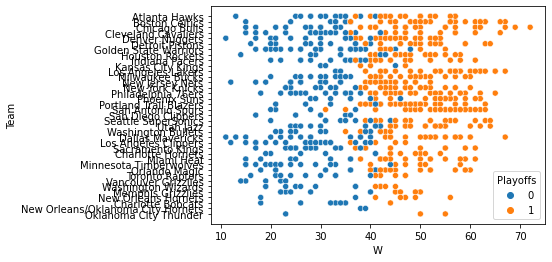

In [ ]:
sns.scatterplot(data=nba_train, x="W", y="Team", hue="Playoffs")
#hence almost 40~45 wins implies team makes it to playoffs

Calculating Difference of Points Scored by team and Opponents team to determine relationship with Wins

In [ ]:
nba_train["PTSdiff"]=nba_train["PTS"]-nba_train["oppPTS"]
nba_train

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PTSdiff
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495,239
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539,639
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684,-222
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370,28
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533,-362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,2011,Sacramento Kings,0,24,8151,8589,3134,6979,2706,5702,428,1277,1455,1981,1071,2526,1675,608,391,1324,-438
831,2011,San Antonio Spurs,1,61,8502,8034,3148,6628,2463,4901,685,1727,1521,1984,829,2603,1836,602,372,1101,468
832,2011,Toronto Raptors,0,22,8124,8639,3144,6755,2799,5664,345,1091,1491,1976,963,2343,1795,581,350,1206,-515
833,2011,Utah Jazz,0,39,8153,8303,3064,6590,2629,5334,435,1256,1590,2061,898,2338,1921,629,484,1175,-150


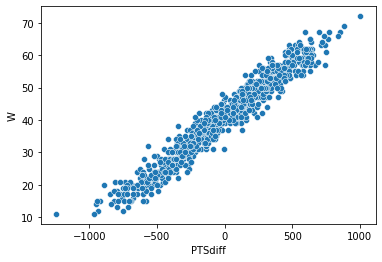

In [ ]:
sns.scatterplot(data= nba_train, x="PTSdiff", y="W") 

Predicting Wins based on Points Difference

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
X= nba_train['PTSdiff'].values.reshape(-1,1)
Y=nba_train['W'].values.reshape(-1,1)
winsReg=lr.fit(X,Y)

In [ ]:
winsReg.score(X,Y)

0.9423424819699614

In [ ]:
winsReg.intercept_

array([41.])

In [ ]:
winsReg.coef_

array([[0.03258633]])

Using Statsmodel for LR modelling for feature selection based on statistics

In [ ]:
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Renaming columns starting with a Numeral

In [ ]:
nba_train.rename(columns={'2PA': 'X2PA', '3PA':'X3PA', '2P':'X2P', '3P':'X3P'}, inplace=True)

In [ ]:
nba_train.iloc[:, 3:].corr()

,W,PTS,oppPTS,FG,FGA,X2P,X2PA,X3P,X3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PTSdiff
W,1.000000,0.298826,-0.331573,0.190396,-0.071446,0.069279,-0.087037,0.119045,0.083286,0.204906,0.161887,-0.095737,0.470897,0.320052,0.116194,0.203921,-0.243186,0.970743
PTS,0.298826,1.000000,0.789075,0.941955,0.793979,0.825725,0.708361,-0.489949,-0.515198,0.697484,0.655059,0.496921,0.090291,0.759889,0.430990,0.152055,0.427138,0.309379
oppPTS,-0.331573,0.789075,1.000000,0.804467,0.830879,0.769841,0.756541,-0.562829,-0.563329,0.550588,0.537215,0.551880,-0.212627,0.542562,0.343480,0.030767,0.582413,-0.340036
FG,0.190396,0.941955,0.804467,1.000000,0.879663,0.942920,0.859225,-0.668273,-0.688763,0.538343,0.521217,0.598591,0.008966,0.812267,0.469730,0.177503,0.517630,0.196691
FGA,-0.071446,0.793979,0.830879,0.879663,1.000000,0.838275,0.864859,-0.607564,-0.605596,0.391691,0.382122,0.737509,-0.050945,0.629117,0.480533,0.121097,0.449981,-0.070726
X2P,0.069279,0.825725,0.769841,0.942920,0.838275,1.000000,0.965309,-0.877866,-0.888600,0.574294,0.574543,0.683118,-0.098690,0.777113,0.489003,0.217712,0.637716,0.072359
X2PA,-0.087037,0.708361,0.756541,0.859225,0.864859,0.965309,1.000000,-0.920732,-0.923244,0.515802,0.523757,0.765615,-0.165315,0.677708,0.490086,0.206107,0.644852,-0.086720
X3P,0.119045,-0.489949,-0.562829,-0.668273,-0.607564,-0.877866,-0.920732,1.000000,0.994511,-0.508713,-0.533897,-0.665168,0.233354,-0.567859,-0.416854,-0.231074,-0.680173,0.121215
X3PA,0.083286,-0.515198,-0.563329,-0.688763,-0.605596,-0.888600,-0.923244,0.994511,1.000000,-0.517850,-0.537783,-0.649173,0.223061,-0.592783,-0.409092,-0.234031,-0.677803,0.083336
FT,0.204906,0.697484,0.550588,0.538343,0.391691,0.574294,0.515802,-0.508713,-0.517850,1.000000,0.950493,0.393399,0.003605,0.447208,0.323157,0.164656,0.438685,0.215445


Parameters with A suffix stands for "Attempted" and they are highly correlated with corresponding success parameters. For example: 2P stands for 2 Pointers and they are highly correrelated with 2PA which is 2 Pointers Attempted

Predicting Points based on rest of predictors

In [ ]:
model=ols("PTS ~ X2PA + X3PA + FTA + ORB+DRB+AST+STL+BLK+TOV ", data= nba_train)
result=model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     817.3
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:04:35   Log-Likelihood:                -5541.1
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     825   BIC:                         1.115e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2050.8108    203.487    -10.078      0.000   -2450.223   -1651.398
X2PA           1.0429      0.030     35.274      0.000       0.985       1.101
X3PA           1.2586      0.038     32.747      0.000       1.183       1.334
FTA            1.1280      0.034     33.440      0.000       1.062       1.194
ORB           -0.9554      0.078    -12.261      0.000      -1.108      -0.802
DRB            0.0388      0.062      0.631      0.528      -0.082       0.160
AST            0.8858      0.044     20.150      0.000       0.799       0.972
STL           -0.1992      0.092     -2.169      0.030      -0.379      -0.019
BLK           -0.0558      0.088     -0.635      0.526      -0.228       0.117
TOV           -0.0248      0.061     -0.405      0.686      -0.145       0.095
==============================================================================
Omnibus:                        1.265   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.531   Jarque-Bera (JB):                1.301
Skew:                          -0.094   Prob(JB):                        0.522
Kurtosis:                       2.951   Cond. No.                     2.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Removing statistically insignificant predictors 

In [ ]:
model=ols("PTS ~ X2PA + X3PA + FTA + ORB+DRB+AST+STL+BLK ", data= nba_train)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     920.4
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:05:41   Log-Likelihood:                -5541.2
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     826   BIC:                         1.114e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2076.6782    193.084    -10.755      0.000   -2455.672   -1697.684
X2PA           1.0435      0.030     35.366      0.000       0.986       1.101
X3PA           1.2627      0.037     34.099      0.000       1.190       1.335
FTA            1.1254      0.033     34.023      0.000       1.060       1.190
ORB           -0.9582      0.078    -12.350      0.000      -1.110      -0.806
DRB            0.0389      0.062      0.632      0.527      -0.082       0.160
AST            0.8861      0.044     20.173      0.000       0.800       0.972
STL           -0.2068      0.090     -2.301      0.022      -0.383      -0.030
BLK           -0.0586      0.087     -0.670      0.503      -0.230       0.113
==============================================================================
Omnibus:                        1.258   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.533   Jarque-Bera (JB):                1.296
Skew:                          -0.093   Prob(JB):                        0.523
Kurtosis:                       2.950   Cond. No.                     2.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model=ols("PTS ~ X2PA + X3PA + FTA + ORB +AST+STL+BLK ", data= nba_train)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1053.
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:06:35   Log-Likelihood:                -5541.4
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     827   BIC:                         1.114e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2015.4630    167.009    -12.068      0.000   -2343.274   -1687.652
X2PA           1.0483      0.029     36.753      0.000       0.992       1.104
X3PA           1.2708      0.035     36.568      0.000       1.203       1.339
FTA            1.1285      0.033     34.506      0.000       1.064       1.193
ORB           -0.9702      0.075    -12.903      0.000      -1.118      -0.823
AST            0.8909      0.043     20.597      0.000       0.806       0.976
STL           -0.2276      0.084     -2.724      0.007      -0.392      -0.064
BLK           -0.0388      0.082     -0.475      0.635      -0.199       0.121
==============================================================================
Omnibus:                        1.168   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                1.208
Skew:                          -0.090   Prob(JB):                        0.546
Kurtosis:                       2.948   Cond. No.                     1.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
modelPTS=ols("PTS ~ X2PA + X3PA + FTA + ORB +AST+STL ", data= nba_train)
resultPTS=modelPTS.fit()
resultPTS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1229.
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:08:08   Log-Likelihood:                -5541.5
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     828   BIC:                         1.113e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2032.7164    162.942    -12.475      0.000   -2352.544   -1712.889
X2PA           1.0500      0.028     37.117      0.000       0.994       1.105
X3PA           1.2731      0.034     37.001      0.000       1.206       1.341
FTA            1.1273      0.033     34.581      0.000       1.063       1.191
ORB           -0.9743      0.075    -13.051      0.000      -1.121      -0.828
AST            0.8884      0.043     20.701      0.000       0.804       0.973
STL           -0.2268      0.084     -2.717      0.007      -0.391      -0.063
==============================================================================
Omnibus:                        1.174   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                1.222
Skew:                          -0.089   Prob(JB):                        0.543
Kurtosis:                       2.942   Cond. No.                     1.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Predicting Opponents Points based on rest of predictors

In [ ]:
modelOPTS=ols("oppPTS  ~ X2PA + X3PA + FTA + ORB+DRB+AST+STL+BLK+TOV  ", data= nba_train)
resultOPTS=modelOPTS.fit()
resultOPTS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 oppPTS   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1119.
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:09:24   Log-Likelihood:                -5430.7
No. Observations:                 835   AIC:                         1.088e+04
Df Residuals:                     825   BIC:                         1.093e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.0949    178.270      0.640      0.522    -235.822     464.012
X2PA           1.6263      0.026     62.788      0.000       1.575       1.677
X3PA           1.8413      0.034     54.685      0.000       1.775       1.907
FTA            0.8098      0.030     27.402      0.000       0.752       0.868
ORB           -1.6897      0.068    -24.752      0.000      -1.824      -1.556
DRB           -1.4553      0.054    -26.980      0.000      -1.561      -1.349
AST           -0.0383      0.039     -0.994      0.320      -0.114       0.037
STL           -1.7971      0.080    -22.342      0.000      -1.955      -1.639
BLK           -0.0988      0.077     -1.284      0.199      -0.250       0.052
TOV            1.3430      0.054     25.058      0.000       1.238       1.448
==============================================================================
Omnibus:                        7.637   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.764
Skew:                          -0.225   Prob(JB):                       0.0206
Kurtosis:                       2.856   Cond. No.                     2.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Removing insignificant predictors

In [ ]:
modelOPTS=ols("oppPTS  ~ X2PA + X3PA + FTA + ORB+DRB+STL +TOV  ", data= nba_train)
resultOPTS=modelOPTS.fit()
resultOPTS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 oppPTS   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1437.
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:10:35   Log-Likelihood:                -5432.1
No. Observations:                 835   AIC:                         1.088e+04
Df Residuals:                     827   BIC:                         1.092e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    140.6485    177.291      0.793      0.428    -207.344     488.641
X2PA           1.6217      0.023     70.166      0.000       1.576       1.667
X3PA           1.8463      0.033     56.503      0.000       1.782       1.910
FTA            0.8056      0.029     27.493      0.000       0.748       0.863
ORB           -1.6858      0.064    -26.161      0.000      -1.812      -1.559
DRB           -1.4910      0.049    -30.215      0.000      -1.588      -1.394
STL           -1.8285      0.078    -23.593      0.000      -1.981      -1.676
TOV            1.3384      0.053     25.047      0.000       1.234       1.443
==============================================================================
Omnibus:                        6.870   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.973
Skew:                          -0.212   Prob(JB):                       0.0306
Kurtosis:                       2.855   Cond. No.                     2.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving NBA_test.csv to NBA_test.csv


In [ ]:
nba_test= pd.read_csv("NBA_test.csv")
nba_test.rename(columns={ '2PA':'X2PA', '3PA':'X3PA', '2P':'X2P', '3P':'X2P'}, inplace=True)
nba_test.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,X2P,X2PA,X2P,X3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,2013,Atlanta Hawks,1,44,8032,7999,3084,6644,2378,4743,706,1901,1158,1619,758,2593,2007,664,369,1219
1,2013,Brooklyn Nets,1,49,7944,7798,2942,6544,2314,4784,628,1760,1432,1958,1047,2460,1668,599,391,1206
2,2013,Charlotte Bobcats,0,21,7661,8418,2823,6649,2354,5250,469,1399,1546,2060,917,2389,1587,591,479,1153
3,2013,Chicago Bulls,1,45,7641,7615,2926,6698,2480,5433,446,1265,1343,1738,1026,2514,1886,588,417,1171
4,2013,Cleveland Cavaliers,0,24,7913,8297,2993,6901,2446,5320,547,1581,1380,1826,1004,2359,1694,647,334,1149


In [ ]:
PTSpred= resultPTS.predict(nba_test)
print(PTSpred)
PTSRMSE=np.sqrt(((PTSpred-nba_test.PTS)**2).mean())
print(PTSRMSE)
OPTSpred=resultOPTS.predict(nba_test)
print(OPTSpred)

0     8086.445941
1     7764.142938
2     7965.347989
3     7784.034052
4     8004.348680
5     8247.427319
6     8601.199687
7     7818.222952
8     8127.481959
9     8619.522653
10    8072.524739
11    8535.752612
12    7527.692632
13    8022.759922
14    8283.674677
15    8159.595153
16    7507.084293
17    7851.878297
18    8197.481092
19    7766.546566
20    7727.528519
21    7942.718063
22    7947.870347
23    8144.708262
24    8335.839573
25    8006.388339
26    7975.788050
27    7873.656027
dtype: float64
196.37234396426763
0     7919.972144
1     7811.790370
2     8251.882424
3     7701.288390
4     8303.223563
5     8100.022655
6     8101.213247
7     8003.964235
8     7954.009398
9     8428.604735
10    7668.463117
11    8139.720561
12    7442.268717
13    7741.169714
14    8268.324743
15    8003.088105
16    7838.337337
17    7874.865825
18    7746.913035
19    8010.749419
20    7845.675631
21    8218.239882
22    8275.777839
23    8452.296756
24    7915.040857
25    8161.7

In [ ]:

OPTSpred=resultOPTS.predict(nba_test)
print(OPTSpred)
OPTSRMSE=np.sqrt(((OPTSpred-nba_test.oppPTS)**2).mean())
print(OPTSRMSE)

0     7919.972144
1     7811.790370
2     8251.882424
3     7701.288390
4     8303.223563
5     8100.022655
6     8101.213247
7     8003.964235
8     7954.009398
9     8428.604735
10    7668.463117
11    8139.720561
12    7442.268717
13    7741.169714
14    8268.324743
15    8003.088105
16    7838.337337
17    7874.865825
18    7746.913035
19    8010.749419
20    7845.675631
21    8218.239882
22    8275.777839
23    8452.296756
24    7915.040857
25    8161.765927
26    7877.569306
27    7851.242043
dtype: float64
132.57648549073937


In [ ]:
predDIFF= PTSpred-OPTSpred
print(predDIFF)

0     166.473798
1     -47.647432
2    -286.534435
3      82.745662
4    -298.874883
5     147.404663
6     499.986439
7    -185.741283
8     173.472561
9     190.917918
10    404.061622
11    396.032051
12     85.423915
13    281.590208
14     15.349934
15    156.507048
16   -331.253043
17    -22.987528
18    450.568057
19   -244.202852
20   -118.147111
21   -275.521819
22   -327.907492
23   -307.588494
24    420.798716
25   -155.377588
26     98.218744
27     22.413983
dtype: float64


In [ ]:
Wpred= winsReg.predict(predDIFF.values.reshape(-1,1))
print(Wpred)
WRMSE=np.sqrt(((Wpred-nba_test.W.values.reshape(-1,1))**2).mean())
print(WRMSE)

[[46.42477058]
 [39.44734493]
 [31.66289352]
 [43.69637768]
 [31.26076359]
 [45.80337742]
 [57.29272452]
 [34.94737274]
 [46.65283462]
 [47.22131481]
 [54.16688648]
 [53.90523221]
 [43.78365213]
 [50.17599225]
 [41.50019807]
 [46.09999076]
 [30.20567808]
 [40.25092077]
 [55.68236067]
 [33.04232458]
 [37.15001891]
 [32.02175431]
 [30.31469733]
 [30.97681895]
 [54.71228701]
 [35.9368142 ]
 [44.20058868]
 [41.73038952]]
7.775459353963299


In [ ]:
playoffspred= np.where( Wpred>45, 1, 0)
print(playoffspred)

[[1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]


In [ ]:
nba_test.Playoffs

0     1
1     1
2     0
3     1
4     0
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    0
16    0
17    1
18    1
19    0
20    0
21    0
22    0
23    0
24    1
25    0
26    0
27    0
Name: Playoffs, dtype: int64

In [ ]:
playoff=pd.DataFrame( np.where( playoffspred==nba_test.Playoffs.values.reshape(-1,1), True , False))
print(playoff)
accuracy= playoff.sum()/len(playoff)
print(accuracy)

        0
0    True
1   False
2    True
3   False
4    True
5   False
6    True
7    True
8    True
9    True
10   True
11   True
12  False
13   True
14  False
15  False
16   True
17  False
18   True
19   True
20   True
21   True
22   True
23   True
24   True
25   True
26   True
27   True
0    0.75
dtype: float64
